# Time Series: Investigate Currency Exchange History £ --> €
## Data: https://www.ofx.com/
## Load libraries and read datafile 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [3]:
fn = 'ofx-GBP-EUR-10y.xlsx'
data = pd.read_excel(fn)
df_fx = pd.DataFrame(data)
df_fx.head()

,Date,Conversion
0,1999-01-04,1.397780
1,1999-01-05,1.409666
2,1999-01-06,1.422982
3,1999-01-07,1.411910
4,1999-01-08,1.420667


### Extra columns showing year, month and day separately

In [4]:
df_fx['Year'], df_fx['Month'], df_fx['Day'] = (df_fx['Date'].dt.year, 
                                               df_fx['Date'].dt.month, 
                                               df_fx['Date'].dt.day)

In [5]:
df_fx.head()

,Date,Conversion,Year,Month,Day
0,1999-01-04,1.397780,1999,1,4
1,1999-01-05,1.409666,1999,1,5
2,1999-01-06,1.422982,1999,1,6
3,1999-01-07,1.411910,1999,1,7
4,1999-01-08,1.420667,1999,1,8


## Split dataframe into 2, i.e. pre- and post-brexit 

In [6]:
date_of_ref = '2016-06-23' # Date of Referendum
df_fx_pre = df_fx.copy()[df_fx['Date'] <= date_of_ref]
df_fx_post = df_fx.copy()[df_fx['Date'] > date_of_ref]

In [7]:
print(df_fx_pre.tail())
print(df_fx_post.head())

           Date  Conversion  Year  Month  Day
5898 2016-06-19    1.273384  2016      6   19
5899 2016-06-20    1.273338  2016      6   20
5900 2016-06-21    1.296336  2016      6   21
5901 2016-06-22    1.302646  2016      6   22
5902 2016-06-23    1.297159  2016      6   23
           Date  Conversion  Year  Month  Day
5903 2016-06-24    1.305769  2016      6   24
5904 2016-06-25    1.228998  2016      6   25
5905 2016-06-26    1.230365  2016      6   26
5906 2016-06-27    1.230365  2016      6   27
5907 2016-06-28    1.196887  2016      6   28


## Re-organize dataframe with having month-day combination as index 

In [8]:
def get_monthday(dt):
   return dt.strftime('%m%d')

df_fx_pre['Month-Day'] = df_fx_pre['Date'].apply(get_monthday)
df_fx_post['Month-Day'] = df_fx_post['Date'].apply(get_monthday)
fx_pre = df_fx_pre[['Conversion', 'Year', 'Month-Day']].set_index(['Month-Day', 'Year']).unstack(1)
fx_post = df_fx_post[['Conversion', 'Year', 'Month-Day']].set_index(['Month-Day', 'Year']).unstack(1)

In [10]:
fx_pre.head()

Conversion                                                    \
Year            1999      2000      2001      2002      2003      2004   
Month-Day                                                                
0101             NaN       NaN  1.584304       NaN       NaN  1.419725   
0102             NaN       NaN  1.576087  1.635618       NaN  1.421382   
0103             NaN       NaN  1.576185  1.600598  1.538632  1.421382   
0104        1.397780  1.585471  1.581533  1.601380       NaN  1.421382   
0105        1.409666  1.588270  1.574778       NaN       NaN  1.417992   

                                                                       \
Year           2005      2006      2007      2008      2009      2010   
Month-Day                                                               
0101       1.268651  1.452857  1.484691  1.362160  1.039724  1.128197   
0102       1.268651  1.453528  1.485132  1.360680  1.043783  1.120105   
0103       1.268651  1.453527  1.486318  1.344571  1.043783  1.121027   
0104       1.413756  1.452408  1.482033  1.338745  1.043783  1.121027   
0105       1.417841  1.450877  1.483945  1.338745  1.045309  1.117052   

                                                                       
Year           2011      2012      2013      2014      2015      2016  
Month-Day                                                              
0101       1.164769  1.197892  1.232354  1.203232       NaN  1.357325  
0102       1.165938  1.197892  1.229838  1.205049       NaN  1.357310  
0103       1.160178  1.199120  1.231857  1.202008       NaN  1.357561  
0104       1.159097  1.198654  1.231853  1.206721  1.277028  1.357561  
0105       1.170850  1.208667  1.228956  1.208091  1.277028  1.360186

## Plots
### Conversion rate in the years 2009 / 2010

Text(0.5, 1.0, 'Conversion Rate £ --> €')

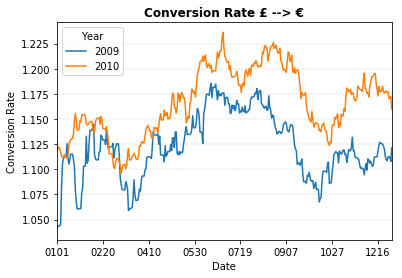

In [13]:
x = fx_pre.index.values
fx_pre['Conversion'][[2009, 2010]].plot()
plt.grid(axis = 'y', color='black', linestyle='--', linewidth=0.1)
plt.xlabel('Date')
plt.ylabel('Conversion Rate')
plt.title('Conversion Rate £ --> €', fontweight="bold")

Text(0.5, 1.0, 'Conversion Rate £ --> €')

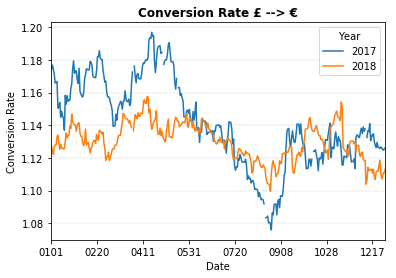

In [12]:
fx_post['Conversion'][[2017, 2018]].plot()
plt.grid(axis = 'y', color='black', linestyle='--', linewidth=0.1)
plt.xlabel('Date')
plt.ylabel('Conversion Rate')
plt.title('Conversion Rate £ --> €', fontweight="bold")